# Meissner effect in one dimension

Programs to solve the GL BVP with an applied field $b_0$ at $x=0$ of half infinite superconductor in region x&gt;0.

I hope the plots below demonstrate the sort of range of behaviors. You can play with them if you click on the rocket icon at the top and select "Live code". You need to wait for the gray box above to report that the kernel is ready. The hidden code below with some initialization should automatically execute, but may add some extra delay. The status of this process can be seen by clicking on the triangle next to "Show code cell source"

The gl function plots a solution of the boundary value problem where $f$ goes to 1, and $b$ to zero at L, which is a proxy for infinity. A number of calls to gl adds extra $f,b$ plots. The remaining boundary conditions are the applied field, $b_0$, and $f=0$ (non-superconducting surface), at $x=0$.

In [15]:
%pip install scipy
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from html.entities import html5

# London boundary conditions: b=da=b0,f=0 at x=0; b=da=0,f=1  at x=L, 
def gl(kappa,L,b0,tex):
  def fun(x,y):
    f = y[0]
    df = y[1]
    a=y[2]
    da=y[3]
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),da,a*f**2))
  def bc(ya, yb):
    return np.array([ya[0], yb[0]-1, ya[3]-b0,yb[3]+yb[2]])
  rng=[0, L]
  x = np.linspace(*rng, 5)
  y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    y[0,k]=1
  sol = solve_bvp(fun, bc, x, y)
  x_plot = np.linspace(*rng, 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"f: {tex}")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"b: {tex}")
  return 0

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


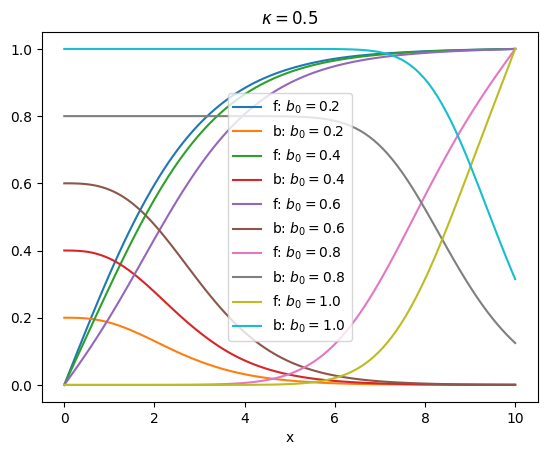

In [16]:
kappa=1/2
L=10

for b in range(1,6):
    b0=b/5
    gl(kappa,L,b0,f"$b_0={b0}$")

plt.xlabel("x")
plt.title(f"$\\kappa={kappa}$")
plt.legend()
plt.show()

We note that with $b_0$ fields of 0.8 and above show a reluctance for $b$ to go to zero, because in &ldquo;reality&rdquo; it doesn't, at least in the GL framework. The critical field is in fact $1/\sqrt2$.

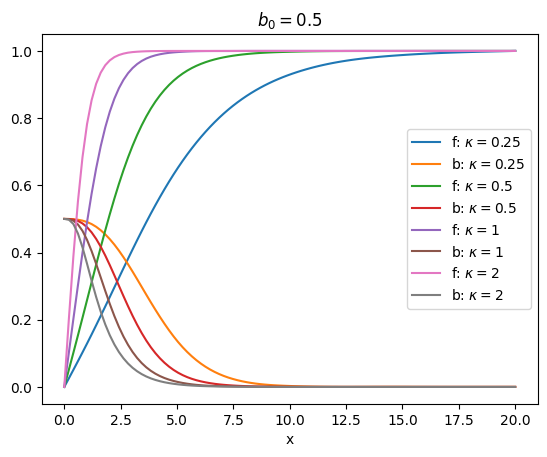

In [17]:
b0=1/2
L=20

for k in range(-2,2):
    kappa=2**k
    gl(kappa,L,b0,f"$\\kappa={kappa}$")

plt.xlabel("x")
plt.title(f"$b_0={b0}$")
plt.legend()
plt.show()